## import library

In [1]:
import os
import numpy as np
import tensorflow as tf
from data_loader import *
from data_utils import *
from model import *
from const import *
import cv2

from IPython.display import Image, display
from matplotlib import pyplot as plt

c:\users\shimd\anaconda3\envs\mondeique\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shimd\anaconda3\envs\mondeique\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shimd\anaconda3\envs\mondeique\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\shimd\anaconda3\envs\mondeique\lib\site-packages\ten

In [2]:
sess = tf.InteractiveSession()

x, y, mask = input_tensor()

y_color_conv, y_shape_conv, y_opening_conv, y_strap_conv, y_pattern_conv, y_carrying_conv, y_charm_conv, y_decoration_conv, is_training, keep_prob = multi_label_net(x)

W0820 21:53:19.818902  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\model.py:7: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 21:53:19.822891  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\ops.py:253: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0820 21:53:19.823888  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\ops.py:141: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0820 21:53:19.946560  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\ops.py:205: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 21:53:20.244786  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\ops.py:181: The name tf.nn.xw_plus_b is deprecated. Pleas

## model saver에 restore 하기 (불러오기)

In [3]:
color_loss, shape_loss, opening_loss, strap_loss, pattern_loss, carrying_loss, charm_loss, decoration_loss, l2_loss, total_loss = selective_loss(y_color_conv, y_shape_conv, y_opening_conv, y_strap_conv, y_pattern_conv, y_carrying_conv, y_charm_conv, y_decoration_conv,y, mask)

print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, './save/current3/model_v3_4.ckpt')
print('OK')

W0820 21:53:23.226164  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\model.py:94: The name tf.add_to_collection is deprecated. Please use tf.compat.v1.add_to_collection instead.

W0820 21:53:23.239130  8072 deprecation_wrapper.py:119] From C:\Users\shimd\Desktop\multi-label-classification\model.py:122: The name tf.log is deprecated. Please use tf.math.log instead.

W0820 21:53:23.407869  8072 deprecation.py:323] From c:\users\shimd\anaconda3\envs\mondeique\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Restore model
OK


## predict function

In [4]:
def predict(PATH):
    img = cv2.imread(PATH)
    img = cv2.resize(img,(64, 64))

    img = (img - 128) / 255.0
    T = np.zeros([64, 64, 3])
    T[:, :, :] = img
    test_img = []
    test_img.append(T)
    test_img = np.asarray(test_img)

    display(Image(filename = PATH, width=100, height=100))

    predict_y_color_conv = sess.run(y_color_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_shape_conv = sess.run(y_shape_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_opening_conv = sess.run(y_opening_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_strap_conv = sess.run(y_strap_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_pattern_conv = sess.run(y_pattern_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_carrying_conv = sess.run(y_carrying_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_charm_conv = sess.run(y_charm_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})
    predict_y_decoration_conv = sess.run(y_decoration_conv, feed_dict={x: test_img, is_training: False, keep_prob: 1})

    
    print('Color: ' + str(np.argmax(predict_y_color_conv)))
    print('Shape: ' + str(np.argmax(predict_y_shape_conv)))
    print('Opening_type: ' + str(np.argmax(predict_y_opening_conv)))
    print('Strap: ' + str(np.argmax(predict_y_strap_conv)))
    print('Pattern: ' + str(np.argmax(predict_y_pattern_conv)))
    print('Carrying: ' + str(np.argmax(predict_y_carrying_conv)))
    print('Charm: ' + str(np.argmax(predict_y_charm_conv)))
    print('Decoration: ' + str(np.argmax(predict_y_decoration_conv)))

# test 과정

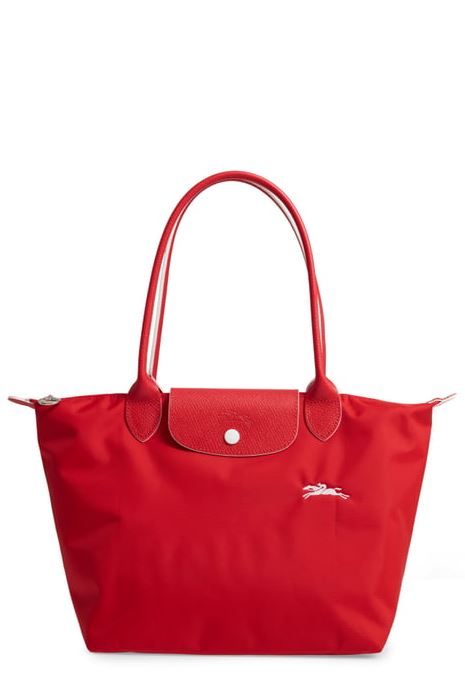

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 1
Charm: 1
Decoration: 5


In [5]:
PATH = './data/bag_image/test_data/test_data_1.jpg'
predict(PATH)

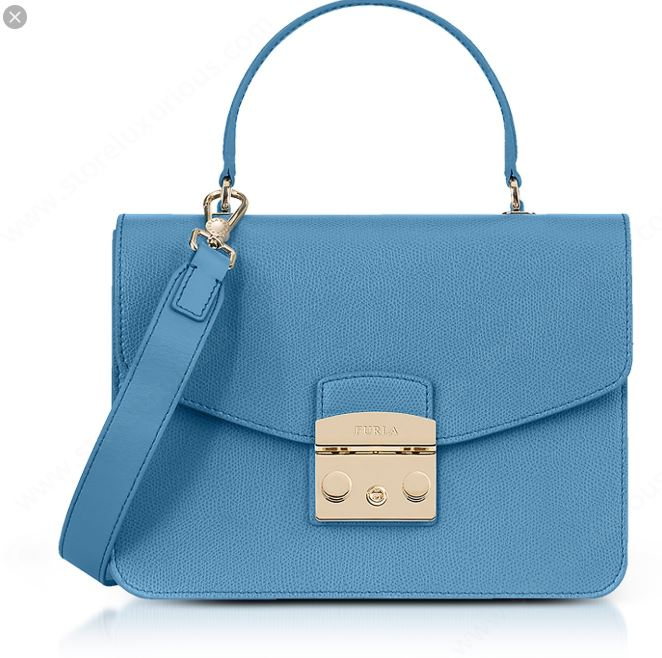

Color: 3
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 1
Charm: 1
Decoration: 0


In [6]:
PATH = './data/bag_image/test_data/test_data_2.jpg'
predict(PATH)

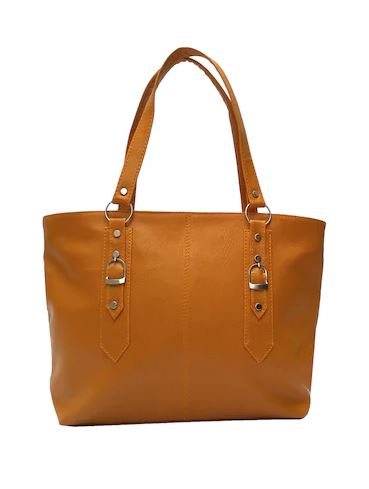

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 2
Charm: 2
Decoration: 5


In [7]:
PATH= './data/bag_image/test_data/test_data_3.JPG'
predict(PATH)

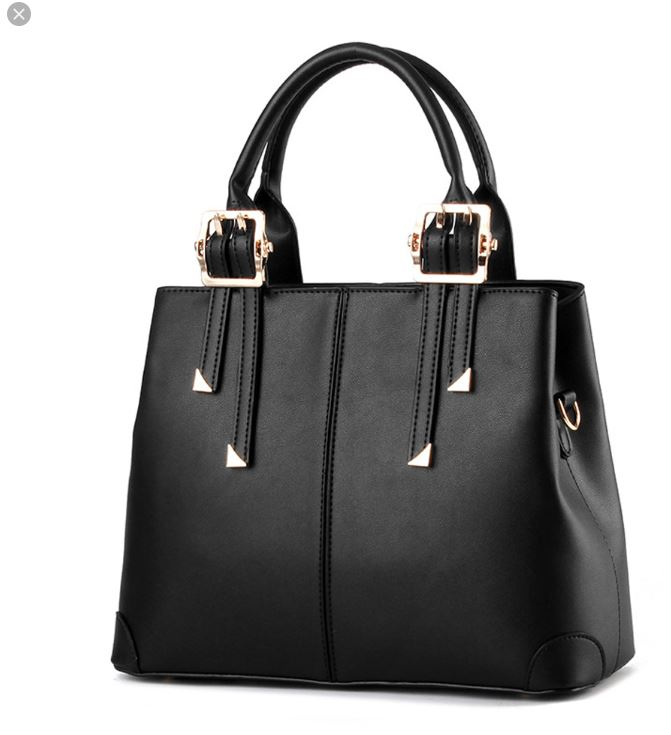

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 2
Charm: 2
Decoration: 5


In [8]:
PATH= './data/bag_image/test_data/test_data_4.JPG'
predict(PATH)

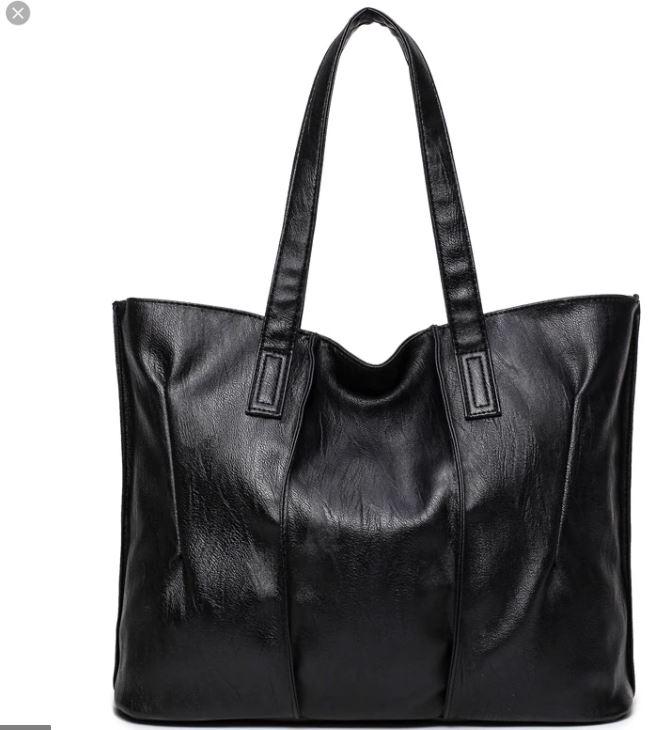

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 1
Charm: 1
Decoration: 5


In [9]:
PATH= './data/bag_image/test_data/test_data_5.JPG'
predict(PATH)

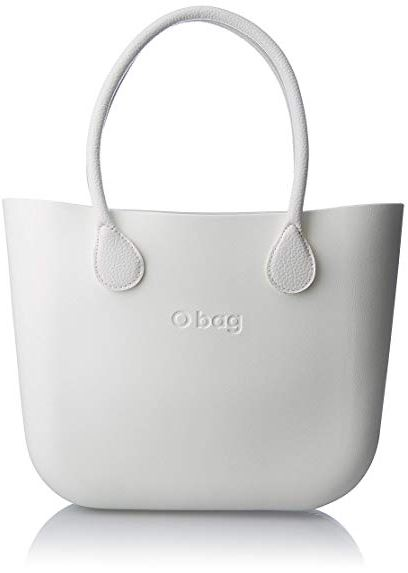

Color: 10
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 1
Charm: 1
Decoration: 5


In [10]:
PATH= './data/bag_image/test_data/test_data_6.JPG'
predict(PATH)

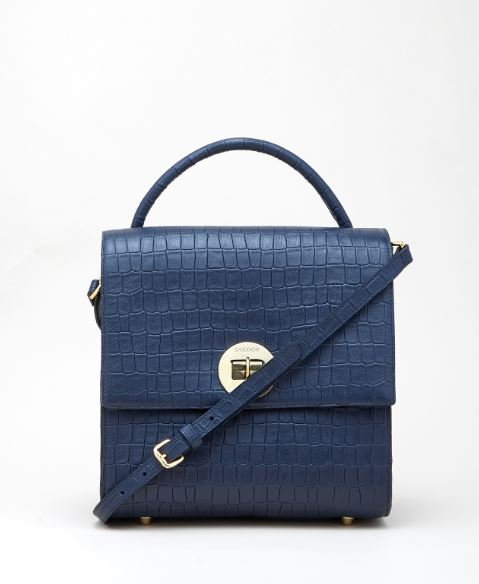

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 2
Charm: 1
Decoration: 5


In [11]:
PATH= './data/bag_image/test_data/test_data_7.JPG'
predict(PATH)

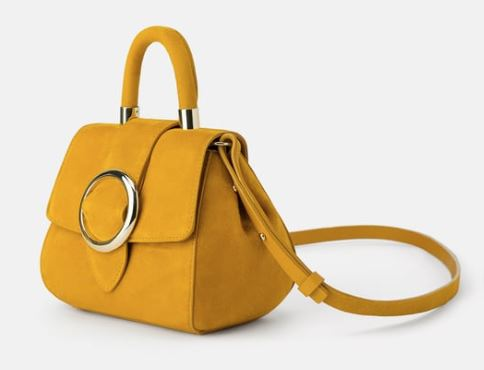

Color: 7
Shape: 4
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 2
Charm: 2
Decoration: 5


In [12]:
PATH= './data/bag_image/test_data/test_data_8.JPG'
predict(PATH)

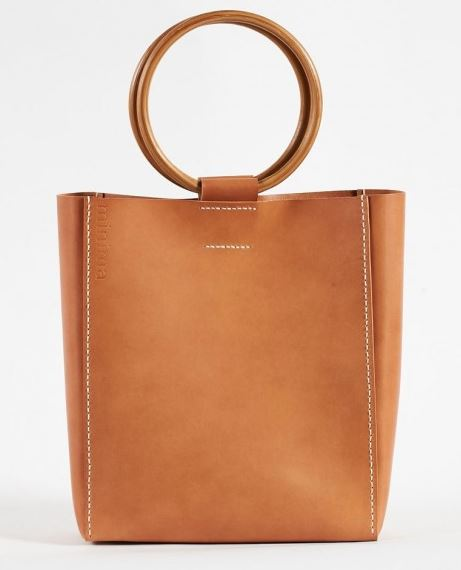

Color: 11
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 0
Carrying: 2
Charm: 1
Decoration: 5


In [13]:
PATH= './data/bag_image/test_data/test_data_9.JPG'
predict(PATH)

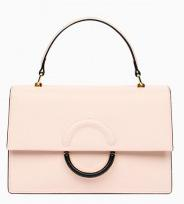

Color: 10
Shape: 1
Opening_type: 1
Strap: 1
Pattern: 4
Carrying: 2
Charm: 2
Decoration: 5


In [14]:
PATH= './data/bag_image/0A8FSZ79E3O_2.JPG'
predict(PATH)